In [107]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sn
df = pd.read_csv('owid-covid-data.csv')
df.dropna(subset = ["people_fully_vaccinated_per_hundred"], inplace=True)
df2=df[['location','date', 'people_fully_vaccinated_per_hundred' ]]
import requests
import json
import matplotlib.pyplot as plt
# ---
import os # for testing only
import covid_daily
import pandas as pd
import covid_daily

rVaccinated = pd.read_csv('Vaccinated2.csv')
rVaccinated.dropna(subset = ["people_fully_vaccinated_per_hundred"], inplace=True)
rVaccinated = rVaccinated[rVaccinated["location"] != 'Gibraltar']
rVaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)

Vaccinated=rVaccinated.copy()

Vaccinated=Vaccinated.query('location in ["US","UK","Canada","Israel","Italy","Germany","Argentina"]')
fig = px.line(Vaccinated, x = 'date', y ='people_fully_vaccinated_per_hundred', color = 'location')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

In [108]:
Vaccinated=rVaccinated.copy()
fig = px.line(Vaccinated, x = 'date', y ='people_fully_vaccinated_per_hundred', color = 'location')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

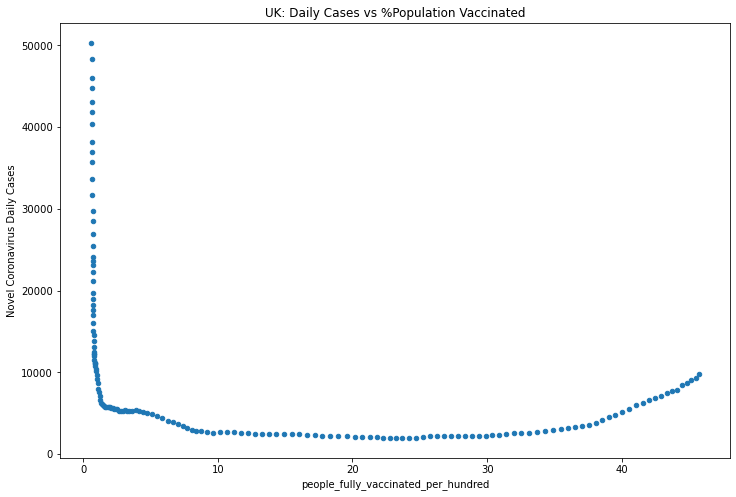

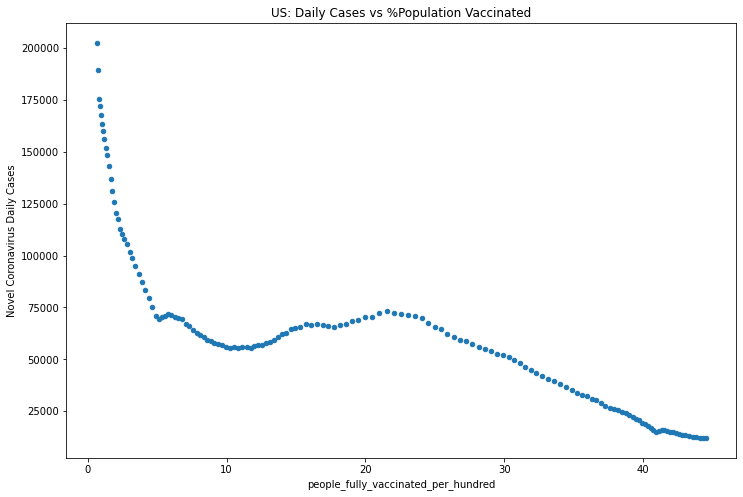

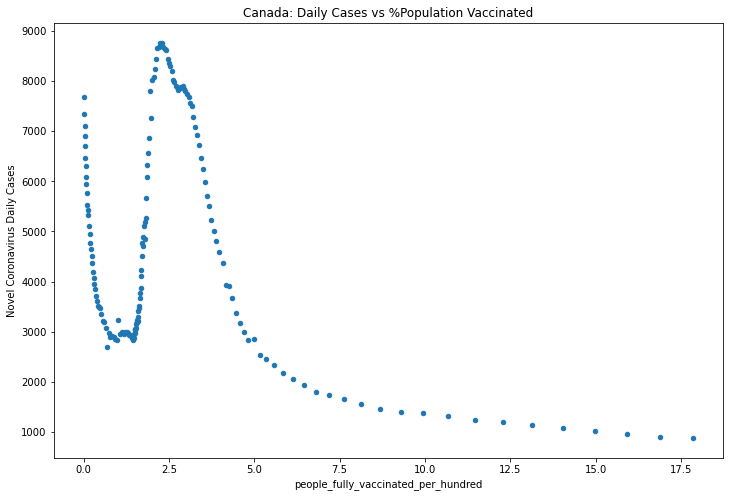

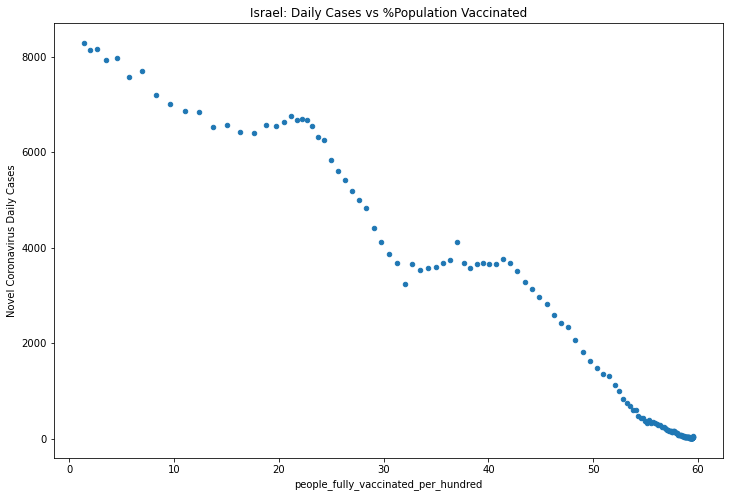

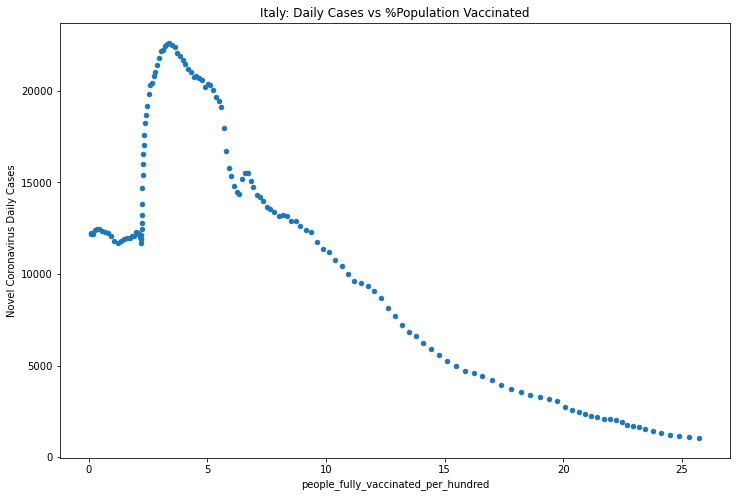

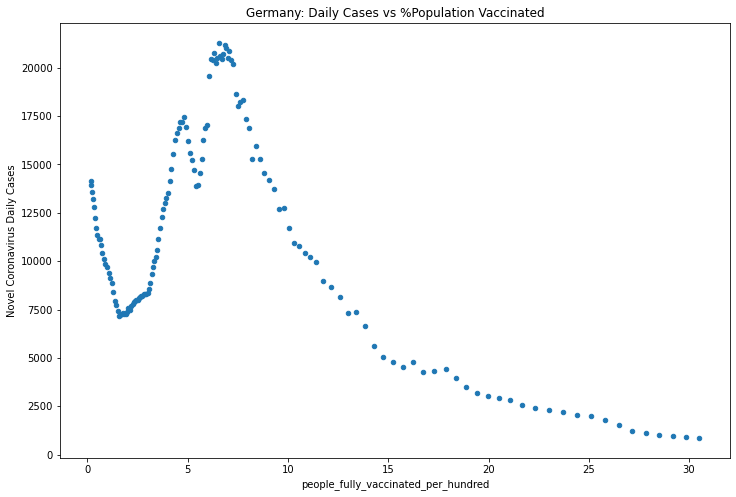

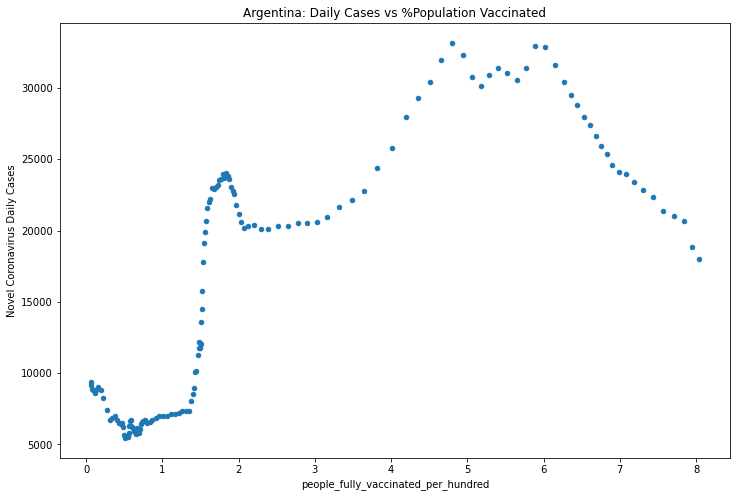

In [109]:

 
#df.dropna(subset = ["people_fully_vaccinated_per_hundred"], inplace=True)
#df2=df[['location','date', 'people_fully_vaccinated_per_hundred' ]]
 
#Vaccinated = df2.copy()
#Vaccinated["location"].replace({"United States": "US", "United Kingdom": "UK"}, inplace=True)
#Vaccinated.to_csv("Vaccinated2.csv")

countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
# Get Data only for Israel
for c in countries:
    KPI = covid_daily.data(country=c, chart = 'graph-cases-daily',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
 
    rolling_merged = merged[['people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases']].rolling(7).mean().dropna()
 
    rolling_merged.plot.scatter('people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases',  
                    figsize=(12,8), title = c+": Daily Cases vs %Population Vaccinated")
   
    
    

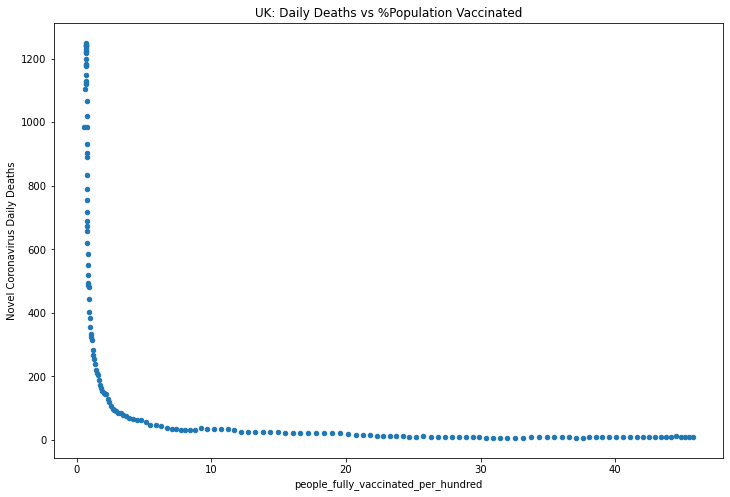

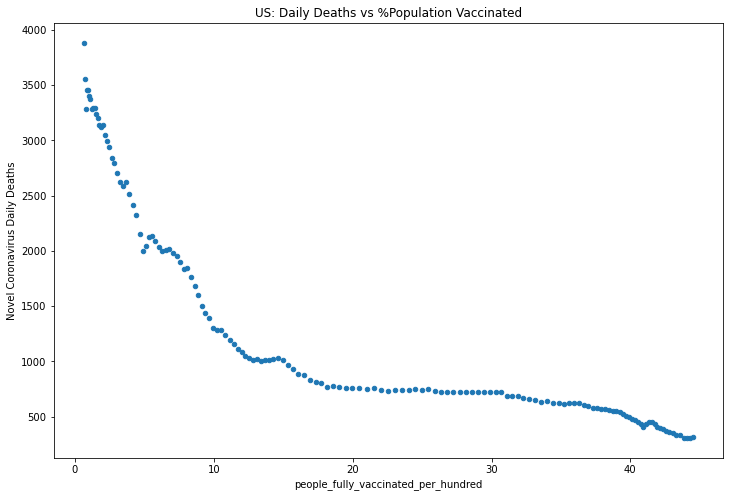

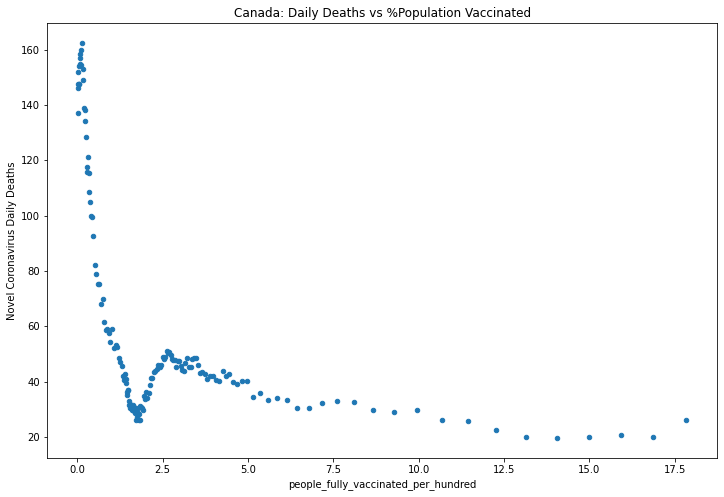

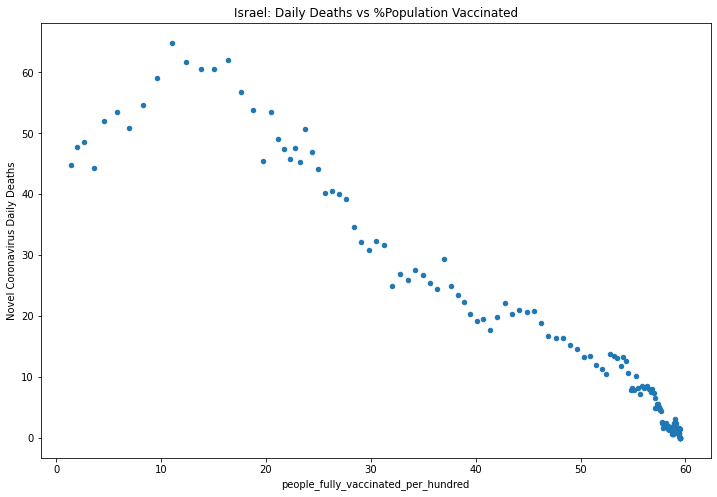

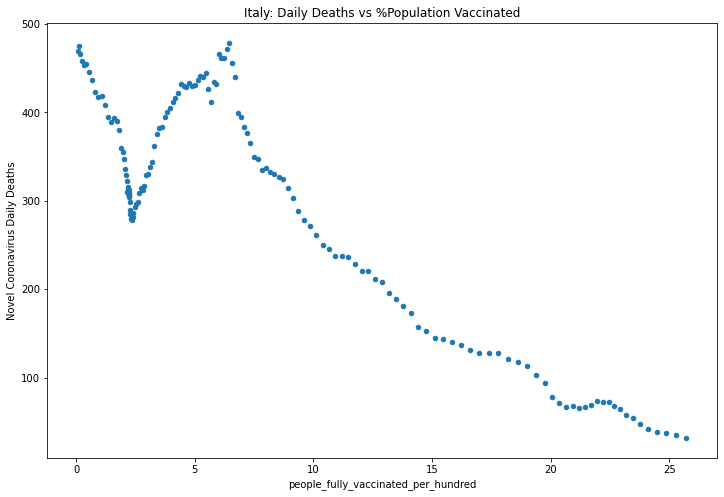

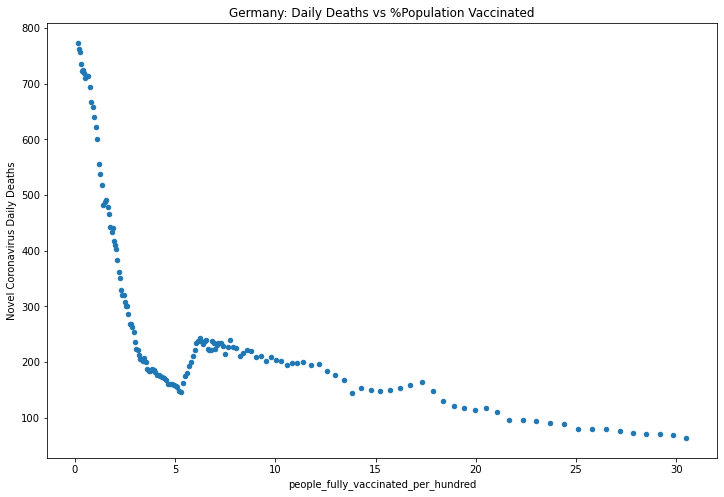

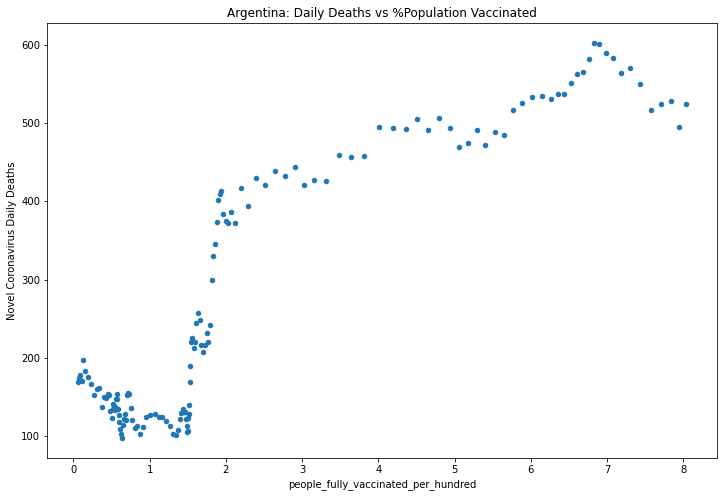

In [110]:
countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
# Get Data only for Israel
for c in countries:
    KPI = covid_daily.data(country=c, chart = 'graph-deaths-daily',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'

    rolling_merged = merged[['people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Deaths']].rolling(7).mean().dropna()
 
    rolling_merged.plot.scatter('people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Deaths',  
                        figsize=(12,8), title = c+": Daily Deaths vs %Population Vaccinated")


In [111]:

countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
for c in countries:
    KPI = covid_daily.data(country= c, chart = 'graph-active-cases-total',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
    merged=merged[['location','date',"Total Coronavirus Currently Infected"]].copy()
#print(merged)

    fig = px.line(merged, x = 'date', y ='Total Coronavirus Currently Infected')
    fig.update_layout(
        title={
            'text' : "Total Coronavirus Currently Infected in "+c,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date",
        yaxis_title="Currently Infected"
    )
    fig.show()



'''
countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
# Get Data only for Israel
for c in countries:
    KPI = covid_daily.data(country=c, chart = 'graph-cases-daily',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
 
    rolling_merged = merged[['people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases']].rolling(7).mean().dropna()
 
    rolling_merged.plot.scatter('people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases',  
                    figsize=(12,8), title = c+": Daily Cases vs %Population Vaccinated")
'''
   



'\ncountries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   \n# Get Data only for Israel\nfor c in countries:\n    KPI = covid_daily.data(country=c, chart = \'graph-cases-daily\',  as_json=False)\n    Vaccinated=rVaccinated.copy()\n    Vaccinated.query("location==\'%s\'" %c, inplace = True)\n    # Start Measuring from the time the vaccines started\n    Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)\n    # Conver the Day to Datetime Index\n    Vaccinated[\'date\'] = pd.DatetimeIndex(Vaccinated[\'date\'])\n \n    # Join the data\n    merged = KPI.merge(Vaccinated, how=\'inner\', left_index=True, right_on=\'date\')\n    merged.index=merged.date\n    merged.index.name = \'Date\'\n \n    rolling_merged = merged[[\'people_fully_vaccinated_per_hundred\', \'Novel Coronavirus Daily Cases\']].rolling(7).mean().dropna()\n \n    rolling_merged.plot.scatter(\'people_fully_vaccinated_per_hundred\', \'Novel Coronavirus Daily Cases\',  \n                    f

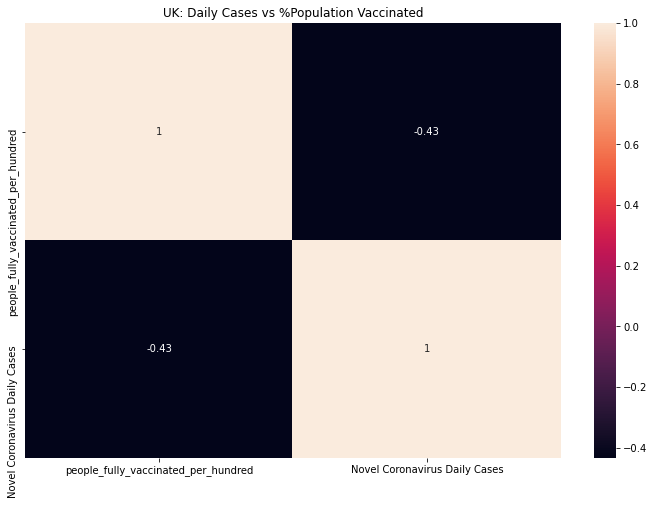

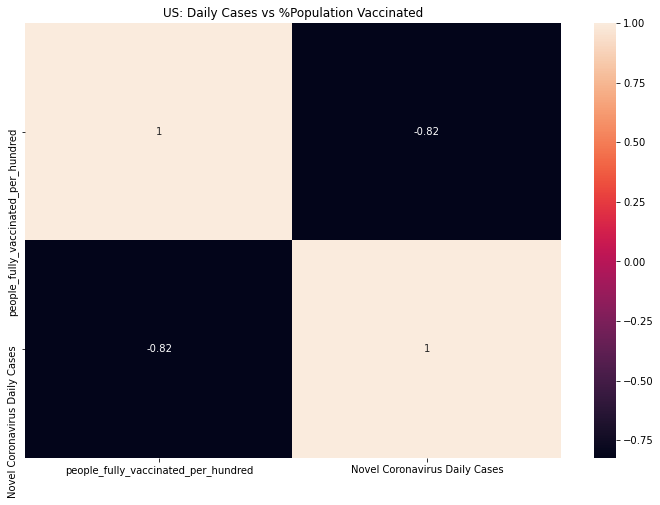

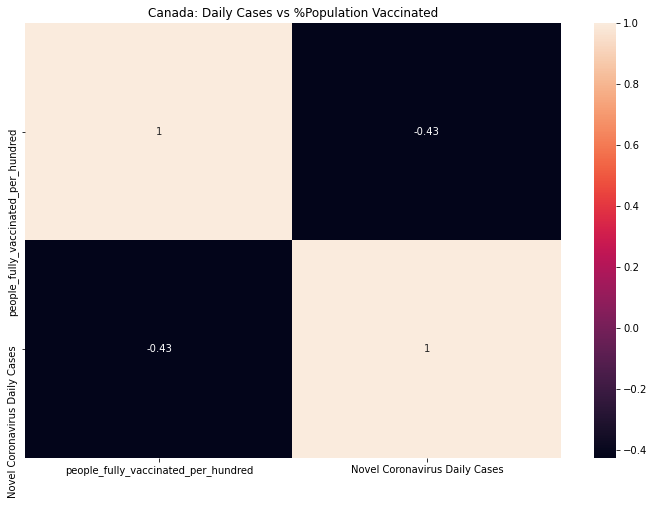

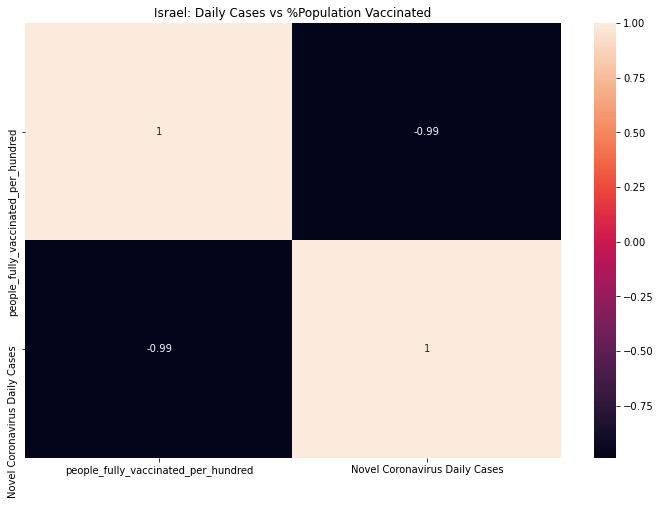

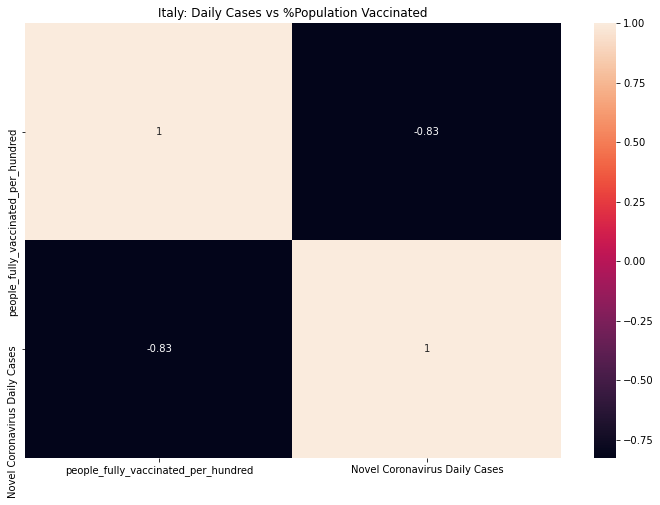

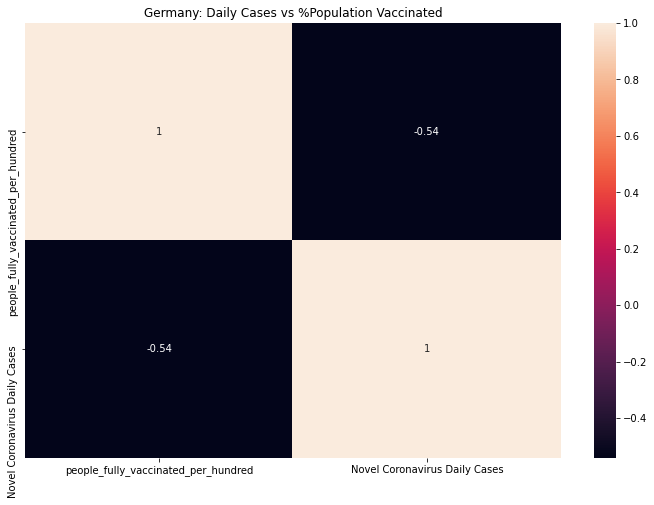

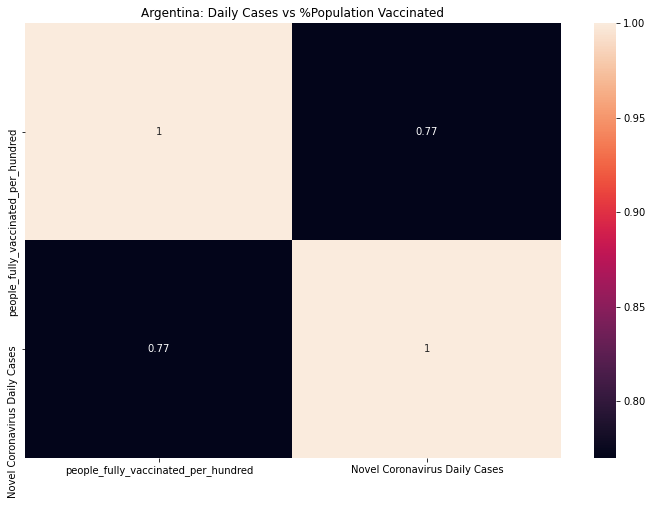

In [112]:
countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
# Get Data only for Israel
for c in countries:
    KPI = covid_daily.data(country=c, chart = 'graph-cases-daily',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
 
    rolling_merged = merged[['people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases']].rolling(7).mean().dropna()  
    rolling_merged.plot.scatter('people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases',  
                    figsize=(12,8), title = c+": Daily Cases vs %Population Vaccinated")
        
        
    corrMatrix = rolling_merged.corr()
    sn.heatmap(corrMatrix, annot=True)
    

In [113]:
counter=0;
esum=0;
country_list=['US','Russia','Germany','France','UK','Japan','India','Italy','Israel','Canada','Spain','South Korea','Switzerland','Netherlands','Argentina']
for c in country_list:
    KPI = covid_daily.data(country=c, chart = 'graph-cases-daily',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
 
    rolling_merged = merged[['people_fully_vaccinated_per_hundred', 'Novel Coronavirus Daily Cases']].rolling(7).mean().dropna()  
    if(rolling_merged['people_fully_vaccinated_per_hundred'].corr(rolling_merged['Novel Coronavirus Daily Cases'])<(-0.5)):
        esum+=rolling_merged['people_fully_vaccinated_per_hundred'].iloc[-1]
        counter+=1
    
print(esum/counter)

32.648392857142866


In [114]:

countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
for c in countries:
    KPI = covid_daily.data(country= c, chart = 'coronavirus-cases-linear',  as_json=False)
    Vaccinated=rVaccinated.copy()
    Vaccinated.query("location=='%s'" %c, inplace = True)
    # Start Measuring from the time the vaccines started
    #Vaccinated.query("people_fully_vaccinated_per_hundred>0" , inplace = True)
    # Conver the Day to Datetime Index
    Vaccinated['date'] = pd.DatetimeIndex(Vaccinated['date'])
 
    # Join the data
    merged = KPI.merge(Vaccinated, how='inner', left_index=True, right_on='date')
    merged.index=merged.date
    merged.index.name = 'Date'
    merged=merged[['location','date',"Total Coronavirus Cases"]].copy()
#print(merged)

    fig = px.line(merged, x = 'date', y ='Total Coronavirus Cases', color = 'location')
    fig.update_layout(
        title={
            'text' : "Total Coronavirus Cases in "+c,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date",
        yaxis_title="Currently Infected"
    )
    fig.show()


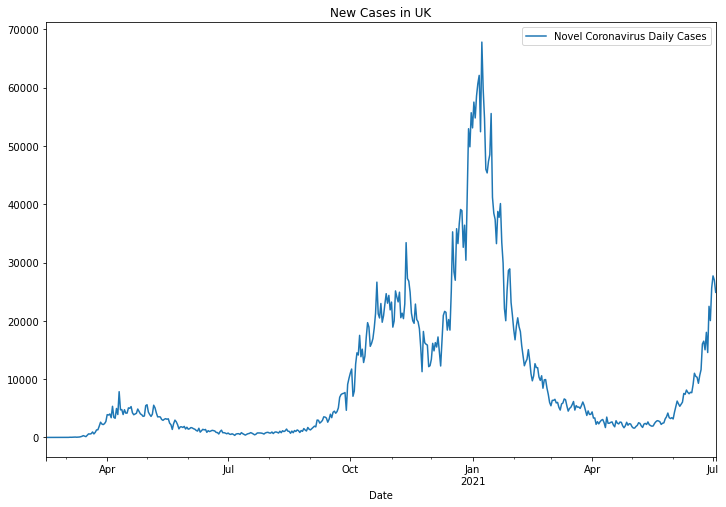

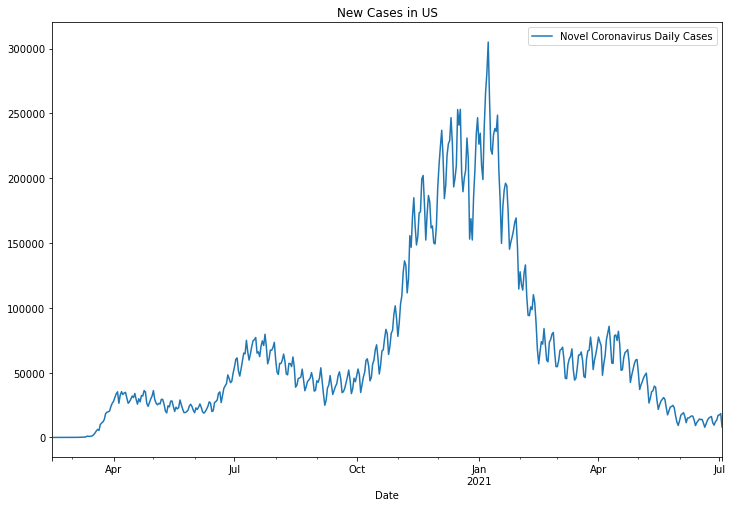

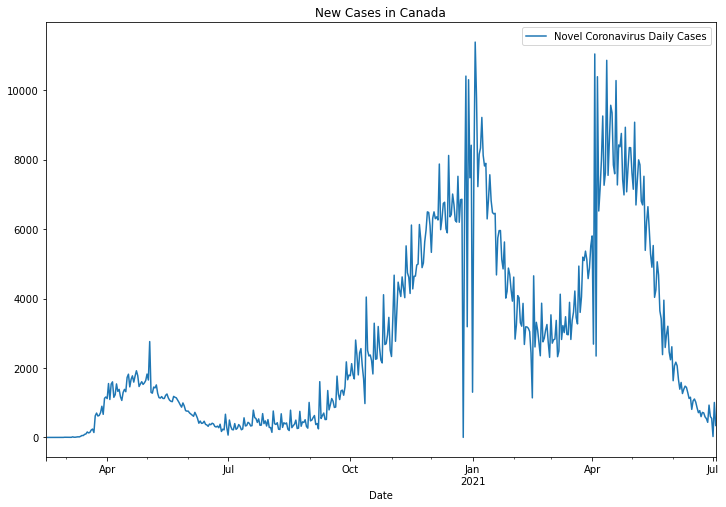

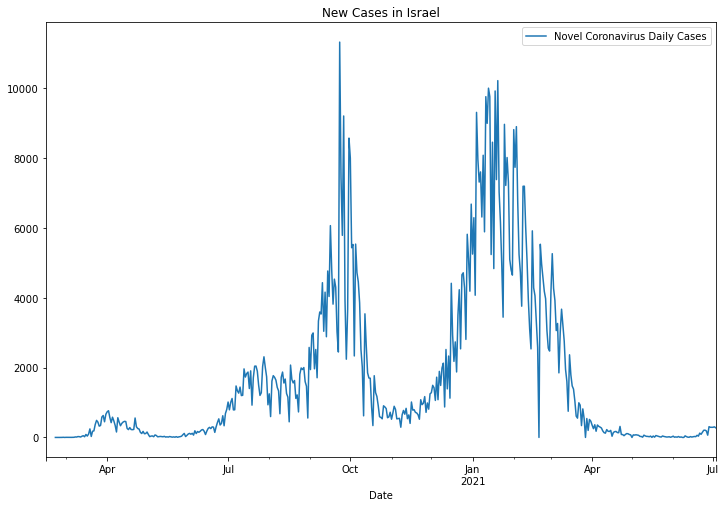

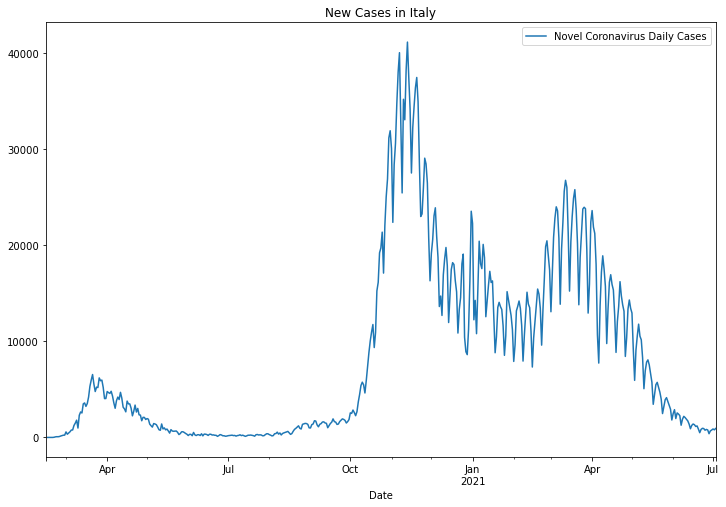

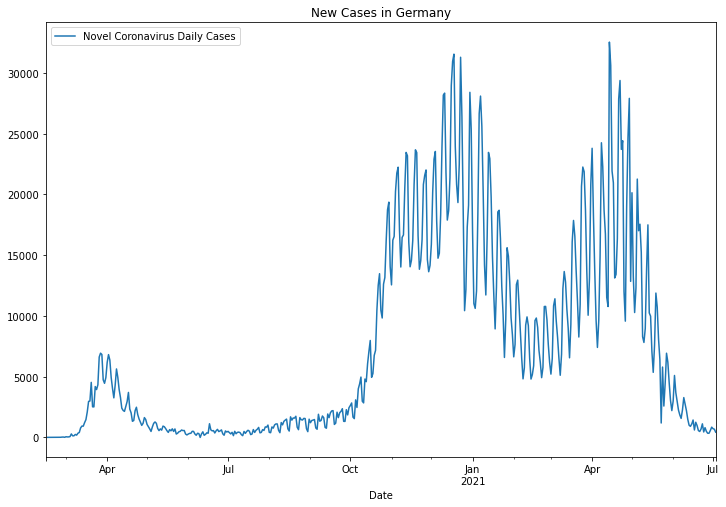

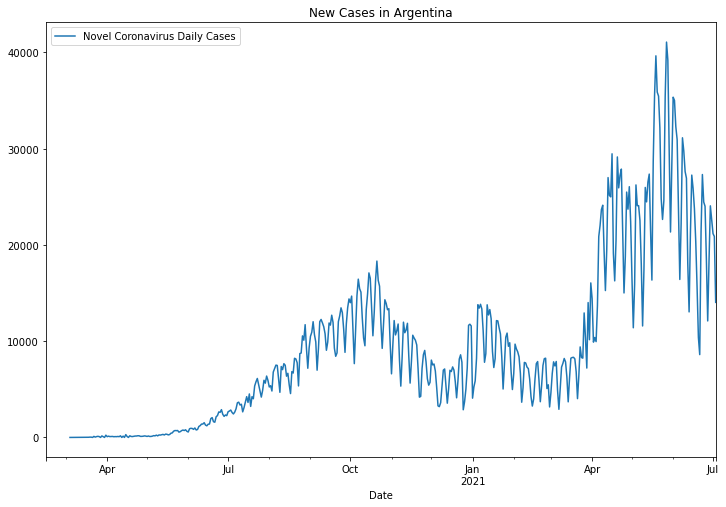

In [115]:
countries=["UK","US","Canada","Israel","Italy","Germany","Argentina"]   
for c in countries:
    covid_daily.data(country=c, chart = 'graph-cases-daily',  as_json=False).plot(figsize=(12,8), title="New Cases in "+c)
